# Projeto 1 - Ciência dos Dados

Nome: Eduardo Machado de Oliveira

Nome: Henrique Leite dos Santos

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\henri\Desktop\CDadosByas


Carregando a base de dados com os tweets classificados manualmente:

In [3]:
train_raw = pd.read_excel('dados_treino.xlsx')
train_raw.head(5)

,Mensagem,Target
0,O autor escreve sua experiência pessoal do que...,Livro
1,Partindo do fundamentalismo cristão e de ideia...,Livro
2,"Não li o livro ainda, então a avaliação refere...",Livro
3,"Não acompanho o youtube, talvez seja a falta d...",Livro
4,"O livro é apenas uma motivação, muito superfic...",Livro


In [4]:
test_raw = pd.read_excel('dados_teste.xlsx')
test_raw.head(5)

,Mensagem,Target
0,Acabei de comprar O Hobbit (versão Kindle) par...,amazon
1,"O diário de Anne Frank trata-se de uma farsa, ...",livro
2,Não achei muita graça não 👎🏻,livro
3,"Olá, Recebi uma notificação por email que não ...",amazon
4,"""Sapiens: uma breve história da humanidade rea...",livro


## Limpeza das mensagens

In [5]:
import re

# Função que limpa as pontuações das mensagens
def clean(text):
    punctuation = '[´"!-.:?;$'']'
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

In [6]:
# Limpando a base de dados treino:
dados_train = []

# Limpeza das mensagens da base de dados TREINO
for i in range(len(train_raw)):
    mensagem_raw = train_raw.Mensagem[i]
    mensagem = clean(mensagem_raw)
    target = train_raw.Target[i]
    
    dados_train.append([mensagem.lower(), target.lower()])
    
train = pd.DataFrame(dados_train, columns=['Mensagem','Target'])

train.head(5)

,Mensagem,Target
0,o autor escreve sua experiência pessoal do que...,livro
1,partindo do fundamentalismo cristão e de ideia...,livro
2,não li o livro ainda então a avaliação referes...,livro
3,não acompanho o youtube talvez seja a falta de...,livro
4,o livro é apenas uma motivação muito superfici...,livro


In [7]:
# Limpando a base de dados teste:
dados_test = []

# Limpeza das mensagens da base de dados TESTE
for i in range(len(test_raw)):
    mensagem_raw = test_raw.Mensagem[i]
    mensagem = clean(mensagem_raw)
    target = test_raw.Target[i]
    
    dados_test.append([mensagem.lower(), target.lower()])
    
test = pd.DataFrame(dados_test, columns=['Mensagem','Target'])

test.head(5)

,Mensagem,Target
0,acabei de comprar o hobbit versão kindle para ...,amazon
1,o diário de anne frank tratase de uma farsa um...,livro
2,não achei muita graça não 👎🏻,livro
3,olá recebi uma notificação por email que não f...,amazon
4,sapiens uma breve história da humanidade realm...,livro


##### Outros métodos de limpeza

Poderia ter sido aplicado, também, outro método para limpeza das mensagens, como remoção de stop-words ou lemmatization.

No caso das stop-words, um arquivo contendo todas essas palavras deveria ser baixado e um loop de remoção dessas palavras
deveria ser criado para limpar as mensagens originais.

Um exemplo de remoção de stop-words:

"Ao caminhar pelo parque, observei muitos pássaros pequenos voando entre as árvores." | Com stop-words

"Caminhar parque, observei pássaros pequenos voando árvores." | Sem stop-words

<br>

Já a lemmatization, seguiria uma mesma estrutura só que um pouco diferente. O processo consiste em transformar as plavra sem "lemas", ou seja, uma forma reduzida. Por esse método, as plavras "corrida", "correndo", "correu" e "corre" seriam reduzidas ao lema "correr", o que simplificaria a análise do texto.

___
## Classificador automático


Faça aqui uma descrição do seu assunto e o que considerou como relevante ou não relevante na classificação dos tweets (Target).

Ao definir a variável Target do projeto, nos colocamos na posição de um empregado da Amazon que deseja saber quais reclamações são em relação à entrega dos livros ou à plataforma Amazon (preços, entrega, etc.) e quais são reclamações relacionadas ao conteúdo dos livros, também incluímos uma target "Outro" para casos que não se aplicam à nenhum dos anteriores.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [8]:
P_target = train.Target.value_counts(normalize=True)

P_livro = P_target[0]
P_amazon = P_target[1]
P_outro = P_target[2]

# Probabilidades de cada target dentro da base de dados
P_target

Target
livro     0.796667
amazon    0.183333
outro     0.020000
Name: proportion, dtype: float64

## Todas as palavras

In [9]:
# Lista de todas as palavras

todas_palavras_df = ''

for i in range(len(test.Mensagem)):
    msg = str(test.Mensagem[i])
    todas_palavras_df += msg + ' '

# Todas as palavras do DataFrame separadas em uma lista
todas_palavras_df = todas_palavras_df.split()

# Series de todas as palavras
serie_df = pd.Series(todas_palavras_df)
tabela_df = serie_df.value_counts()

# Todas as palavras diferentes
palavras_diferentes = len(tabela_df)

### Todas as palavras em "Amazon"

In [10]:
# Lista de todas as palavras na categoria Amazon

mensagens_amazon = train.loc[train['Target']=='amazon', ['Mensagem']]
mensagens_amazon = mensagens_amazon.reset_index(drop=True)

todas_palavras_amazon = ''

for i in range(len(mensagens_amazon['Mensagem'])):
    msg = str(mensagens_amazon.Mensagem[i])
    todas_palavras_amazon += msg + ' '
    
# Todas as palavras da target "amazon" separadas em uma lista
todas_palavras_amazon = todas_palavras_amazon.split()

# Series de todas as palavras da target "amazon"
serie_amazon = pd.Series(todas_palavras_amazon)
tabela_amazon = serie_amazon.value_counts()

### Todas as palavras em "Livro"

In [11]:
# Lista de todas as palavras na categoria Livros

mensagens_livro = train.loc[train['Target']=='livro', ['Mensagem']]
mensagens_livro = mensagens_livro.reset_index(drop=True)

todas_palavras_livro = ''

for i in range(len(mensagens_livro['Mensagem'])):
    msg = str(mensagens_livro.Mensagem[i])
    todas_palavras_livro += msg + ' '
    
# Todas as palavras da target "livro" separadas em uma lista
todas_palavras_livro = todas_palavras_livro.split()

# Series de todas as palavras da target "livro"
serie_livro = pd.Series(todas_palavras_livro)
tabela_livro = serie_livro.value_counts()

### Todas as palavras em "Outro"

In [12]:
# Lista de todas as palavras na categoria Outros

mensagens_outro = train.loc[train['Target']=='outro', ['Mensagem']]
mensagens_outro = mensagens_outro.reset_index(drop=True)

todas_palavras_outro = ''

for i in range(len(mensagens_outro['Mensagem'])):
    msg = str(mensagens_outro.Mensagem[i])
    todas_palavras_outro += msg + ' '
    
# Todas as palavras da target "outro" separadas em uma lista
todas_palavras_outro = todas_palavras_outro.split()

# Series de todas as palavras da target "livro"
serie_outro = pd.Series(todas_palavras_outro)
tabela_outro = serie_outro.value_counts()

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [13]:
for i in range(len(test['Mensagem'])):
    msg = test.Mensagem[i]
    palavras = msg.split()
    alpha = 1
    
    amazon_parcial = 1
    livro_parcial = 1
    outro_parcial = 1
    
    
    # A multiplicação por 1000 das parciais vieram para "Frear" a velocidade com que essas probabilidades ficam muito pequenas
    # Já que o Python estava arredondando para 0, o que impossibilitava uma análise correta;
    # Essa multiplicação não altera o resultado final, já que todas as parcelas são multiplicadas pelo mesmo fator.


    for palavra in palavras:
        if palavra not in todas_palavras_amazon:
            amazon_parcial *= ((0 + alpha)/(sum(tabela_amazon) + palavras_diferentes))*1000
        else:
            amazon_parcial *= ((tabela_amazon[palavra] + alpha)/(sum(tabela_amazon) + palavras_diferentes))*1000
            
            
        if palavra not in todas_palavras_livro:
            livro_parcial *= ((0 + alpha)/(sum(tabela_livro) + palavras_diferentes))*1000
        else:
            livro_parcial *= ((tabela_livro[palavra] + alpha)/(sum(tabela_livro) + palavras_diferentes))*1000
            
        
        if palavra not in todas_palavras_outro:
            outro_parcial *= ((0 + alpha)/(sum(tabela_outro) + palavras_diferentes))*1000
        else:
            outro_parcial *= ((tabela_outro[palavra] + alpha)/(sum(tabela_outro) + palavras_diferentes))*1000
            
    if outro_parcial > amazon_parcial and outro_parcial > livro_parcial:
        test.loc[i, 'Predição'] = 'outro'
    elif amazon_parcial > livro_parcial and amazon_parcial > outro_parcial:
        test.loc[i, 'Predição'] = 'amazon'
    elif livro_parcial > amazon_parcial and livro_parcial > outro_parcial:
        test.loc[i, 'Predição'] = 'livro'

        
# DataFrame TESTE com a coluna das predições (classificações do classificador)
test.head()

,Mensagem,Target,Predição
0,acabei de comprar o hobbit versão kindle para ...,amazon,amazon
1,o diário de anne frank tratase de uma farsa um...,livro,amazon
2,não achei muita graça não 👎🏻,livro,livro
3,olá recebi uma notificação por email que não f...,amazon,amazon
4,sapiens uma breve história da humanidade realm...,livro,livro


In [14]:
real_x_predicao = pd.crosstab(test['Predição'], test['Target'], normalize = False, margins = True)

# Tabela cruzada das classificações feitas pelo classificador e as classificações originais
real_x_predicao

Target,amazon,livro,outro,All
Predição,,,,
amazon,41,20,3,64
livro,5,129,2,136
All,46,149,5,200


## Verificando a acertividade do classificador

In [15]:
# Calculando a acurácia
if 'outro' not in test.Predição:
    P_acerto = (real_x_predicao['amazon']['amazon'] + real_x_predicao['livro']['livro'] + 0)/real_x_predicao['All']['All']
else:
    P_acerto = (real_x_predicao['amazon']['amazon'] + real_x_predicao['livro']['livro'] + real_x_predicao['outro']['outro'])/real_x_predicao['All']['All']

print(f'A probabilidade de acerto (acurácia) é de: {P_acerto*100:.2f}%')



# Calculando falsos positivos, falsos negativos, verdadeiros positivos e verdadeiros negativos:
# Para essa etapa, consideramos "AMAZON" como relevante e "LIVRO" e "OUTRO" como irrelevante:


# Verdadeiro positivos:
# Mensagens da tag "AMAZON", classificadas como "AMAZON"
P_V_pos = real_x_predicao['amazon']['amazon']/real_x_predicao['amazon']['All']
print(f'A probabilidade de verdadeiro positivo é de: {P_V_pos*100:.2f}%')



# Falso positivo:
# Mensagens das tags "LIVRO" e "OUTRO", classificadas como "AMAZON"
P_F_pos = (real_x_predicao['livro']['amazon'] + real_x_predicao['outro']['amazon'])/real_x_predicao['All']['amazon']
print(f'A probabilidade de falso positivo é de: {P_F_pos*100:.2f}%')



# Verdadeiro negativo:
# Mensagens das tags "LIVRO" e "OUTRO", classificadas como "LIVRO" ou "OUTRO"
if 'outro' not in test.Predição:
    P_V_neg = (real_x_predicao['livro']['livro'] + real_x_predicao['outro']['livro'] + 0 + 0)/(real_x_predicao['livro']['All'] + real_x_predicao['outro']['All'])
else:
    P_V_neg = (real_x_predicao['livro']['livro'] + real_x_predicao['outro']['livro'] + real_x_predicao['livro']['outro'] + real_x_predicao['outro']['outro'])/(real_x_predicao['livro']['All'] + real_x_predicao['outro']['All'])

print(f'A probabilidade de verdadeiro negativo é de: {P_V_neg*100:.2f}%')



# Falso negativo:
# Mensagens da tag "AMAZON", classificadas como "OUTRO" ou "LIVRO"
if 'outro' not in test.Predição:
    P_F_neg = (real_x_predicao['amazon']['livro'] + 0)/real_x_predicao['amazon']['All']
else:
    P_F_neg = (real_x_predicao['amazon']['livro'] + real_x_predicao['amazon']['outro'])/real_x_predicao['amazon']['All']
    
print(f'A probabilidade de falso negativo é de: {P_F_neg*100:.2f}%')

A probabilidade de acerto (acurácia) é de: 85.00%
A probabilidade de verdadeiro positivo é de: 89.13%
A probabilidade de falso positivo é de: 35.94%
A probabilidade de verdadeiro negativo é de: 85.06%
A probabilidade de falso negativo é de: 10.87%


___
### Concluindo

## Considerando o contexto dado ao início do notebook
*Ao definir a variável Target do projeto, nos colocamos na posição de um empregado da Amazon que deseja saber quais reclamações são em relação à entrega dos livros ou à plataforma Amazon (preços, entrega, etc.) e quais são reclamações relacionadas ao conteúdo dos livros.*

O que justifica a nossa variável relevante ser "AMAZON" e a irrelevante ser o conjunto "LIVRO" e "OUTRO"

## 1 – Acurácia:

O classificador, esteve correto na classificação de 85% das mensagens. Isso indica uma precisão geral do classificador, mas não diz muito a respeito da sua sensibilidade ou especificidade, para isso, precisamos analisar as probabilidades de verdadeiros positivos e verdadeiros negativos;

## 2 – Verdadeiros positivos (Sensibilidade):

A probabilidade de verdadeiros positivos foi de 89.13%. Isso demonstra que o classificador consegue identificar muito bem mensagens da que são realmente da tag "AMAZON", em relação ao total real de mensagens dessa tag. Com um valor tão alto, o classificador parece ser eficaz na identificação de casos positivos.

## 3 – Falso positivo:

A probabilidade de falso positivo foi de 35.94%. Isso indica a taxa de erro do classificador ao classificar incorretamente casos negativos como positivos, ou seja, mensagens originalmente das tag “LIVRO” e “OUTRO” como sendo da tag “AMAZON”. Esse valor está relativamente alto, mostrando que o classificador está cometendo muitos erros desse tipo.

## 4 – Verdadeiro negativo (Especificidade):

A probabilidade de verdadeiro negativo foi de 85.06%. Isso demonstra que o classificador consegue identificar corretamente as mensagens direcionadas às tags “LIVRO” e “OUTRO”, em relação ao total real de mensagens dessas tags. Com um valor tão alto, o classificador parece ser eficaz na identificação de casos realmente negativos.

## 5 – Falso negativo:

A probabilidade de falso negativo foi de 10.87%. Isso indica a chance de o classificador classificar incorretamente casos positivos como negativos, ou seja, mensagens que originalmente eram da tag “AMAZON” como sendo de outra tag. Com um valor relativamente baixo, concluímos que o classificador está cometendo poucos erros desse tipo.

<br>

#### Mensagens de dupla negação ou sarcásticas

No contexto de mensagens que contém dupla negação ou sarcasmo, o classificador Naive-Byas com certeza não é a melhor ferramente, já que interpreta cada mensagem (independente da conotação) a partir de sua probabilidade dentro da base de dados TREINO, desconsiderando completamente qualquer artifício linguístico.

<br>

#### Plano de expansão:
1 - Para melhorar a acurácia, sensibilidade e especificidade do classificador, seria necessário ter uma base de dados significativamente maior para que o classificador pudesse ter mais informação na hora de calcular as probabilidades;

2 - Melhorar o tratamento do texto também é uma boa opção, utilizando técnicas de remoção de stop-words, lemmatization entre outras. Essa melhora no tratamento aumentaria a eficácia na hora da classificação das mensagens.

<br>

#### Por que financiar o projeto?
O classificador pode ser uma ferramenta muito útil para automatizar a classificação das mensagens. Essa automatização melhoraria a qualidade na tomada de decisões da empresa o que, consequentemente, aumentaria os lucros.

___
### Qualidade do Classificador a partir de novas separações dos reviews entre Treinamento e Teste

In [16]:
# Novo dataframe que junta as mensagens da base TREINO e TESTE
frames = [test_raw, train_raw]
todos_raw = pd.concat(frames)
todos_raw = todos_raw.reset_index(drop=True)

todos_raw

,Mensagem,Target
0,Acabei de comprar O Hobbit (versão Kindle) par...,amazon
1,"O diário de Anne Frank trata-se de uma farsa, ...",livro
2,Não achei muita graça não 👎🏻,livro
3,"Olá, Recebi uma notificação por email que não ...",amazon
4,"""Sapiens: uma breve história da humanidade rea...",livro
...,...,...
495,Bom quanto a Qualidade dos livros estão em per...,Amazon
496,Há alguns dias atrás adquiri um produto na Ama...,Amazon
497,Comecei a leitura hoje e estou abismado com a ...,Livro
498,"Concordo com outras avaliações feitas, entre o...",Livro


In [17]:
# Limpando a base de dados com todas mensagens:
dados_todos = []

# Limpeza das mensagens da base de dados de treino
for i in range(len(todos_raw)):
    mensagem_raw = todos_raw.Mensagem[i]
    mensagem = clean(mensagem_raw)
    target = todos_raw.Target[i]
    
    dados_todos.append([mensagem.lower(), target.lower()])
    
todos = pd.DataFrame(dados_todos, columns=['Mensagem','Target'])

todos

,Mensagem,Target
0,acabei de comprar o hobbit versão kindle para ...,amazon
1,o diário de anne frank tratase de uma farsa um...,livro
2,não achei muita graça não 👎🏻,livro
3,olá recebi uma notificação por email que não f...,amazon
4,sapiens uma breve história da humanidade realm...,livro
...,...,...
495,bom quanto a qualidade dos livros estão em per...,amazon
496,há alguns dias atrás adquiri um produto na ama...,amazon
497,comecei a leitura hoje e estou abismado com a ...,livro
498,concordo com outras avaliações feitas entre ou...,livro


In [18]:
# Criando novo DataFrame com mistura das mensagens:
from sklearn.utils import shuffle

lista_V_pos = []
lista_V_neg = []


for i in range(100):
    # Criação do novo DataFrame

    novo_df = shuffle(todos).copy()
    novo_df = novo_df.reset_index(drop=True)
    novo_train = novo_df.iloc[0:300,]
    novo_test = novo_df.iloc[300:,]
    novo_test = novo_test.reset_index(drop=True)
    
    ######################################
    # Lista de todas as palavras

    todas_palavras_df = ''

    for k in range(len(novo_test.Mensagem)):
        msg = str(novo_test.Mensagem[k])
        todas_palavras_df += msg + ' '

    # Todas as palavras do DataFrame separadas em uma lista
    todas_palavras_df = todas_palavras_df.split()

    # Series de todas as palavras
    serie_df = pd.Series(todas_palavras_df)
    tabela_df = serie_df.value_counts()


    # Todas as palavras diferentes
    palavras_diferentes = len(tabela_df)
    

    ######################################
    # Lista de todas as palavras na categoria Amazon

    mensagens_amazon = novo_train.loc[novo_train['Target']=='amazon', ['Mensagem']]
    mensagens_amazon = mensagens_amazon.reset_index(drop=True)

    todas_palavras_amazon = ''

    for l in range(len(mensagens_amazon['Mensagem'])):
        msg = str(mensagens_amazon.Mensagem[l])
        todas_palavras_amazon += msg + ' '

    # Todas as palavras da targer "amazon" separadas em uma lista
    todas_palavras_amazon = todas_palavras_amazon.split()

    # Series de todas as palavras da target "amazon"
    serie_amazon = pd.Series(todas_palavras_amazon)
    tabela_amazon = serie_amazon.value_counts()


    # Todas as palavras dentro de amazon
    palavras_diferentes_amazon = len(tabela_amazon)
    

    ######################################
    # Lista de todas as palavras na categoria Livros

    mensagens_livro = novo_train.loc[novo_train['Target']=='livro', ['Mensagem']]
    mensagens_livro = mensagens_livro.reset_index(drop=True)

    todas_palavras_livro = ''

    for m in range(len(mensagens_livro['Mensagem'])):
        msg = str(mensagens_livro.Mensagem[m])
        todas_palavras_livro += msg + ' '

    # Todas as palavras da target "livro" separadas em uma lista
    todas_palavras_livro = todas_palavras_livro.split()

    # Series de todas as palavras da target "livro"
    serie_livro = pd.Series(todas_palavras_livro)
    tabela_livro = serie_livro.value_counts()


    # Todas as palavras dentro de amazon
    palavras_diferentes_livro = len(tabela_livro)
    

    ######################################
    # Lista de todas as palavras na categoria Outros

    mensagens_outro = novo_train.loc[novo_train['Target']=='outro', ['Mensagem']]
    mensagens_outro = mensagens_outro.reset_index(drop=True)

    todas_palavras_outro = ''

    for n in range(len(mensagens_outro['Mensagem'])):
        msg = str(mensagens_outro.Mensagem[n])
        todas_palavras_outro += msg + ' '

    # Todas as palavras da target "outro" separadas em uma lista
    todas_palavras_outro = todas_palavras_outro.split()

    # Series de todas as palavras da target "livro"
    serie_outro = pd.Series(todas_palavras_outro)
    tabela_outro = serie_outro.value_counts()

    
    # Todas as palavras dentro de amazon
    palavras_diferentes_outro = len(tabela_outro)
    
    
    ######################################
    ######################################
    
    # Loop do classificador
    
    for j in range(len(novo_test['Mensagem'])):
        msg = novo_test.Mensagem[j]
        palavras = msg.split()
        alpha = 1

        amazon_parcial = 1
        livro_parcial = 1
        outro_parcial = 1

        for palavra in palavras:
            if palavra not in todas_palavras_amazon:
                amazon_parcial *= ((0 + alpha)/(sum(tabela_amazon) + palavras_diferentes))*1000
            else:
                amazon_parcial *= ((tabela_amazon[palavra] + alpha)/(sum(tabela_amazon) + palavras_diferentes))*1000


            if palavra not in todas_palavras_livro:
                livro_parcial *= ((0 + alpha)/(sum(tabela_livro) + palavras_diferentes))*1000
            else:
                livro_parcial *= ((tabela_livro[palavra] + alpha)/(sum(tabela_livro) + palavras_diferentes))*1000


            if palavra not in todas_palavras_outro:
                outro_parcial *= ((0 + alpha)/(sum(tabela_outro) + palavras_diferentes))*1000
            else:
                outro_parcial *= ((tabela_outro[palavra] + alpha)/(sum(tabela_outro) + palavras_diferentes))*1000

        if outro_parcial > amazon_parcial and outro_parcial > livro_parcial:
            novo_test.loc[j, 'Predição'] = 'outro'
        elif amazon_parcial > livro_parcial and amazon_parcial > outro_parcial:
            novo_test.loc[j, 'Predição'] = 'amazon'
        elif livro_parcial > amazon_parcial and livro_parcial > outro_parcial:
            novo_test.loc[j, 'Predição'] = 'livro'
    
    real_x_predicao = pd.crosstab(novo_test['Predição'], novo_test['Target'], normalize = False, margins = True)

    # Verdadeiro positivos:
    # Mensagens da tag "AMAZON", classificadas como "AMAZON"
    P_V_pos = real_x_predicao['amazon']['amazon']/real_x_predicao['amazon']['All']
    lista_V_pos.append(P_V_pos)
        
    # Verdadeiro negativo:
    # Mensagens das tags "LIVRO" e "OUTRO", classificadas como "LIVRO" ou "OUTRO"
    
    # Caso não haja categoria "OUTRO" na base de dados TESTE
    if 'outro' not in test.Mensagem:
        if 'outro' not in test.Predição:
            P_V_neg = (real_x_predicao['livro']['livro'] + 0 + 0 + 0)/(real_x_predicao['livro']['All'] + 0)
        else:
            P_V_neg = (real_x_predicao['livro']['livro'] + 0 + real_x_predicao['livro']['outro'] + 0)/(real_x_predicao['livro']['All'] + 0)
    
    else:
        if 'outro' not in test.Predição:
            P_V_neg = (real_x_predicao['livro']['livro'] + real_x_predicao['outro']['livro'] + 0 + 0)/(real_x_predicao['livro']['All'] + real_x_predicao['outro']['All'])
        else:
            P_V_neg = (real_x_predicao['livro']['livro'] + real_x_predicao['outro']['livro'] + real_x_predicao['livro']['outro'] + real_x_predicao['outro']['outro'])/(real_x_predicao['livro']['All'] + real_x_predicao['outro']['All'])

    lista_V_neg.append(P_V_neg)

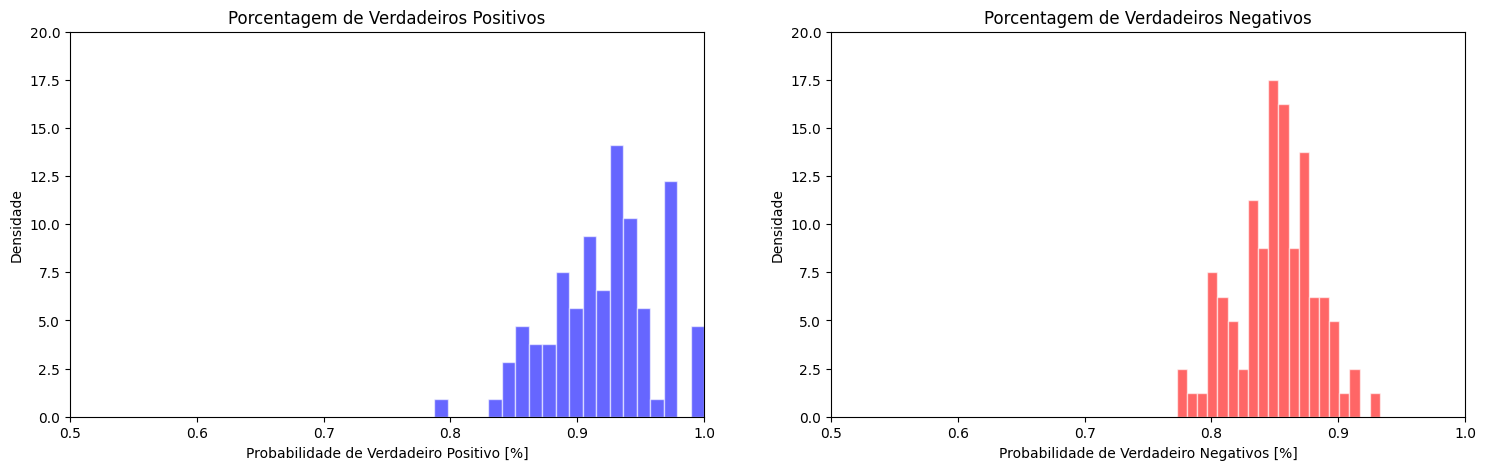

In [19]:
plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(lista_V_pos, bins=20, color='b', edgecolor='white', density=True, alpha=0.6)
plt.ylim(0,20)
plt.xlim(0.5,1)
plt.title("Porcentagem de Verdadeiros Positivos")
plt.xlabel('Probabilidade de Verdadeiro Positivo [%]')
plt.ylabel('Densidade')

plt.subplot(122)
plt.hist(lista_V_neg, bins=20, color='r', edgecolor='white', density=True, alpha=0.6)
plt.ylim(0,20)
plt.xlim(0.5,1)
plt.title('Porcentagem de Verdadeiros Negativos')
plt.xlabel('Probabilidade de Verdadeiro Negativos [%]')
plt.ylabel('Densidade')
plt.show()

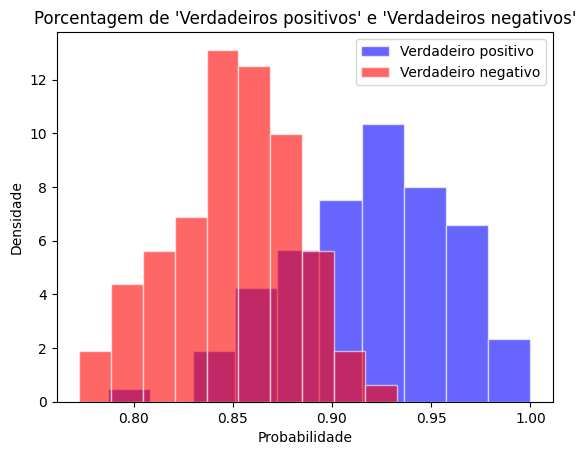

In [20]:
plt.hist(lista_V_pos, color='b', edgecolor='white', density=True, alpha=0.6, label='Verdadeiro positivo')
plt.hist(lista_V_neg, color='r', edgecolor='white', density=True, alpha=0.6, label='Verdadeiro negativo')
plt.legend()
plt.title("Porcentagem de 'Verdadeiros positivos' e 'Verdadeiros negativos'")
plt.xlabel('Probabilidade')
plt.ylabel('Densidade')

plt.show()

Neste histograma podemos observar que a quantidade de verdadeiros positivos (cor azul) está mais concentrada à direita do gráfico, o que indica uma maior acurácia do nosso classificador em definir como "AMAZON" tags que realmente são "AMAZON". Já no caso de verdadeiros negativos (cor vermelha), ou seja, mensagens que nosso classificador definiu como "LIVRO" ou "OUTRO", tags que originalmente eram "LIVRO" ou "OUTRO", está mais deslocada para a esquerda, apresentando um menor acerto nesses casos. (Provavelmente, devido à separação de verdadeiro negativo em duas tags)

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CONSIDEROU mais de duas categorias na variável Target e INCREMENTOU a quantidade de notícias, mantendo pelo menos 250 notícias por categoria (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* Para Target com duas categorias: CRIOU pelo menos quatro categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto (pelo menos dois cenários, exceto aqueles já apresentados em sala pelos professores: por exemplo, filtro de spam)
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item Qualidade do Classificador a partir de novas separações das Notícias entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

### Por que não podemos utilizar o classificador para gerar mais amostras de treinamento:

1 - O classificador inicial pode ter algum tipo de limitação ou viés. Esses problemas fariam com que a geração de novas amostras sejam problemáticas, o que levaria a uma perpetuação do erro.

2 - Possibilidade de novas amostras serem iguais às originais, o que implicaria numa falta de diversidade de palavras para ele aprender. Tornando a análise de novos textos muito difícil.

### Diferentes cenários para Naïve Bayes

1 - Detecção de transações suspeitas em contas de bancos com base na atividade dessas contas;

2 - Detecção de doenças em hospitais com base nos sintomas;

3 - Direcionamento de anúncios baseado no tipo de busca do usuário.

### Melhorias reais com indicações concretas de como implementar

1 - Pré-processamento de texto de qualidade:

- Remoção de stop-words: As stop words são palavras que não agregam informação crucial para as frases (são utilizadas para tornar a escrita em algo mais natural e fluido). Alguns exemplos de stop words em português são: 'em', 'para', 'da', 'que', 'o' e assim por diante. A remoção dessas palavras da frase, a torna mais objetiva o que, dependendo do caso, pode resultar em uma análise mais fiel e correta da mensagem original; 

    - Um exemplo de remoção de stop-words: 
        
        "Ao caminhar pelo parque, observei muitos pássaros pequenos voando entre as árvores." | Com stop-words 
        
        "Caminhar parque, observei pássaros pequenos voando árvores." | Sem stop-words
        
    - Fonte: [Text pre-processing: Stop words removal](https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a)

   
- Lemmatization: A lematização é o processo de agrupar diferentes formas flexionadas da mesma palavra em lemas, ou seja, uma forma reduzida. Por esse método, as plavras "corrida", "correndo", "correu" e "corre" seriam reduzidas ao lema "correr", o que simplificaria a análise do texto.

    - Fonte: [TechTarget definition: Lemmatization](https://www.techtarget.com/searchenterpriseai/definition/lemmatization#:~:text=Lemmatization%20is%20the%20process%20of,processing%20(NLP)%20and%20chatbots)

<br>

2 - Balanceamento das classes target:

- Uma outra forma de melhorar a análise do classificador, seria fazendo um balanceamento melhor das targets classificadas. Isso poderia ser feito através de métodos de oversampling da target com menos informações ou undersampling da target com mais informações.

- Esses passos poderiam ser feitos de forma randômica (existem bibliotecas no Python para isso) em que deve-se duplicar aleatoriamente a target minoritária para atingir um número equilibrado de targets, ou excluir, também aleatóriamente, mensagens da target majoritária até atingir o equilíbrio.

    - Fonte: [Random Oversampling and Undersampling for Imbalanced Classification](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/)
    
        

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**